In [1]:
import warnings
import pandas as pd

# Suppress specific deprecation warnings
warnings.filterwarnings('ignore', category=DeprecationWarning, message="is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.")

# Load the dataset
file_path = 'Online Sales Data.csv'
sales_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
sales_data.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [2]:
# Data Cleaning and Preparation
# Check for missing values
missing_values = sales_data.isnull().sum()

# Convert 'Date' column to datetime
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

# Check for duplicates and remove them
sales_data.drop_duplicates(inplace=True)

# Ensure 'Total Revenue' is correctly calculated
sales_data['Total Revenue'] = sales_data['Units Sold'] * sales_data['Unit Price']

# Display the cleaned data info
sales_data.info(), sales_data.head(), missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    240 non-null    int64         
 1   Date              240 non-null    datetime64[ns]
 2   Product Category  240 non-null    object        
 3   Product Name      240 non-null    object        
 4   Units Sold        240 non-null    int64         
 5   Unit Price        240 non-null    float64       
 6   Total Revenue     240 non-null    float64       
 7   Region            240 non-null    object        
 8   Payment Method    240 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 17.0+ KB


(None,
    Transaction ID       Date Product Category             Product Name  \
 0           10001 2024-01-01      Electronics            iPhone 14 Pro   
 1           10002 2024-01-02  Home Appliances         Dyson V11 Vacuum   
 2           10003 2024-01-03         Clothing         Levi's 501 Jeans   
 3           10004 2024-01-04            Books        The Da Vinci Code   
 4           10005 2024-01-05  Beauty Products  Neutrogena Skincare Set   
 
    Units Sold  Unit Price  Total Revenue         Region Payment Method  
 0           2      999.99        1999.98  North America    Credit Card  
 1           1      499.99         499.99         Europe         PayPal  
 2           3       69.99         209.97           Asia     Debit Card  
 3           4       15.99          63.96  North America    Credit Card  
 4           1       89.99          89.99         Europe         PayPal  ,
 Transaction ID      0
 Date                0
 Product Category    0
 Product Name        0
 Uni

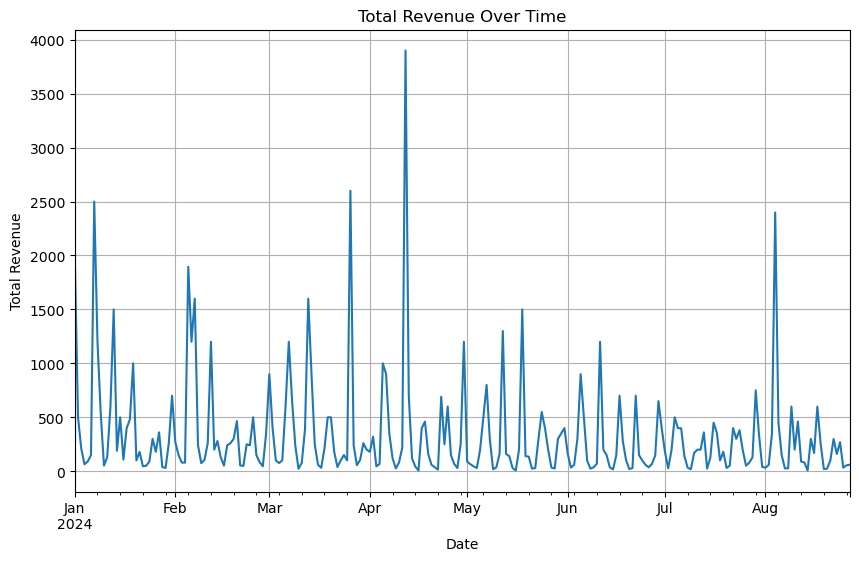

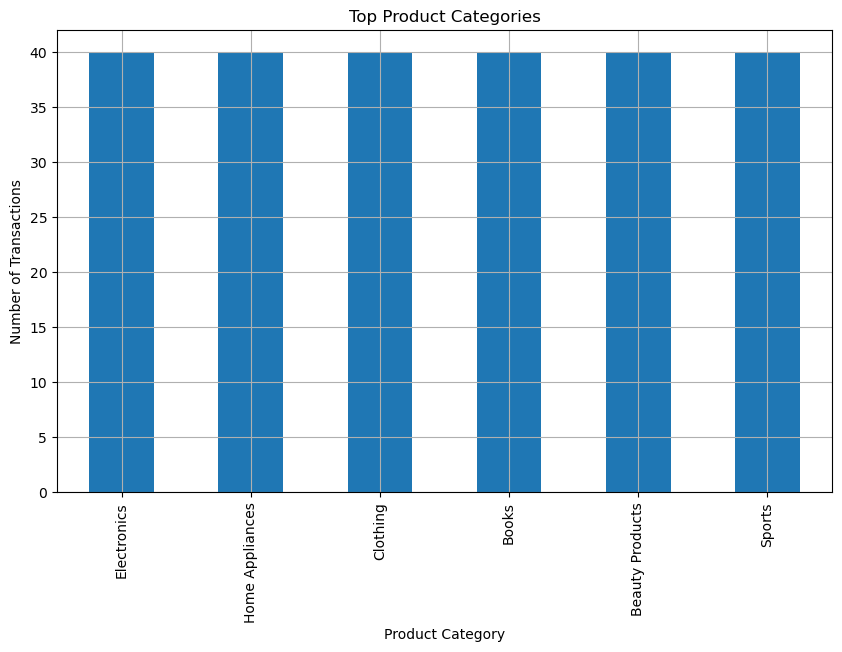

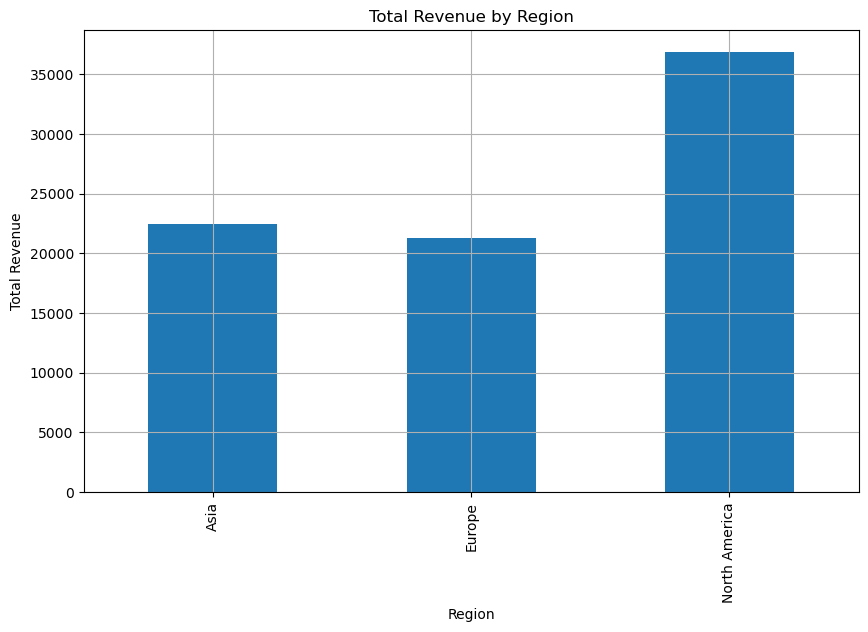

,Transaction ID,Date,Units Sold,Unit Price,Total Revenue
count,240.00000,240,240.000000,240.000000,240.000000
mean,10120.50000,2024-04-29 12:00:00,2.158333,236.395583,335.699375
min,10001.00000,2024-01-01 00:00:00,1.000000,6.500000,6.500000
25%,10060.75000,2024-02-29 18:00:00,1.000000,29.500000,62.965000
50%,10120.50000,2024-04-29 12:00:00,2.000000,89.990000,179.970000
75%,10180.25000,2024-06-28 06:00:00,3.000000,249.990000,399.225000
max,10240.00000,2024-08-27 00:00:00,10.000000,3899.990000,3899.990000
std,69.42622,NaN,1.322454,429.446695,485.804469


In [3]:
import matplotlib.pyplot as plt

# Descriptive statistics
desc_stats = sales_data.describe()

# Sales trends over time
plt.figure(figsize=(10, 6))
sales_data.groupby('Date')['Total Revenue'].sum().plot()
plt.title('Total Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

# Top product categories
plt.figure(figsize=(10, 6))
sales_data['Product Category'].value_counts().plot(kind='bar')
plt.title('Top Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

# Sales distribution by region
plt.figure(figsize=(10, 6))
sales_data.groupby('Region')['Total Revenue'].sum().plot(kind='bar')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

# Display descriptive statistics
desc_stats

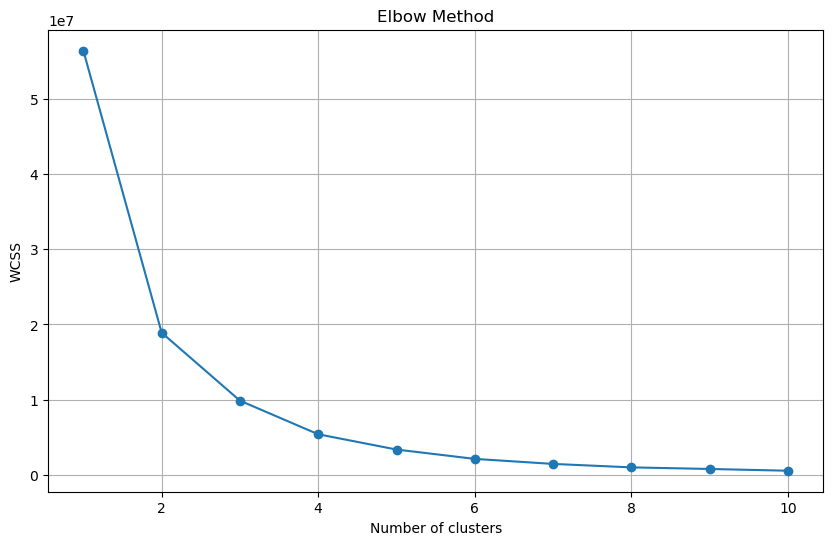

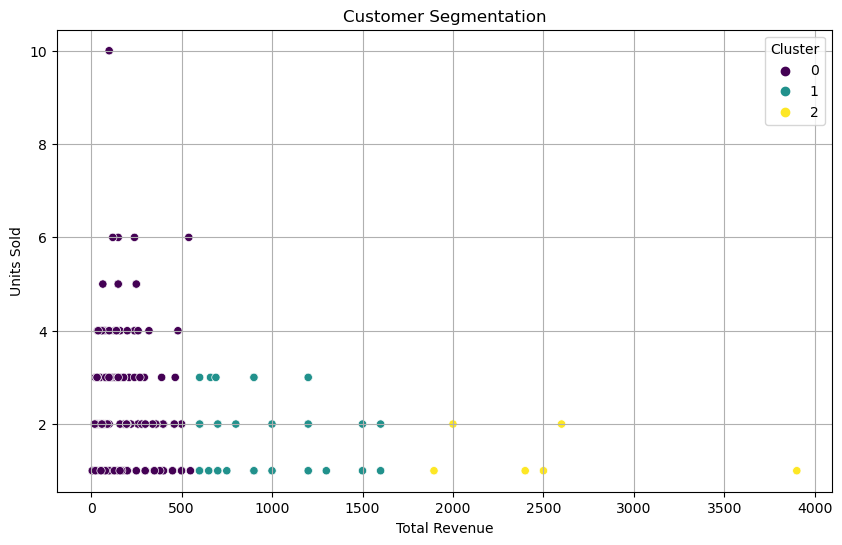

In [4]:
from sklearn.cluster import KMeans
import seaborn as sns

# Prepare data for clustering
clustering_data = sales_data[['Total Revenue', 'Units Sold']]

# Determine the number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(clustering_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
sales_data['Cluster'] = kmeans.fit_predict(clustering_data)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sales_data, x='Total Revenue', y='Units Sold', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Total Revenue')
plt.ylabel('Units Sold')
plt.grid(True)
plt.show()

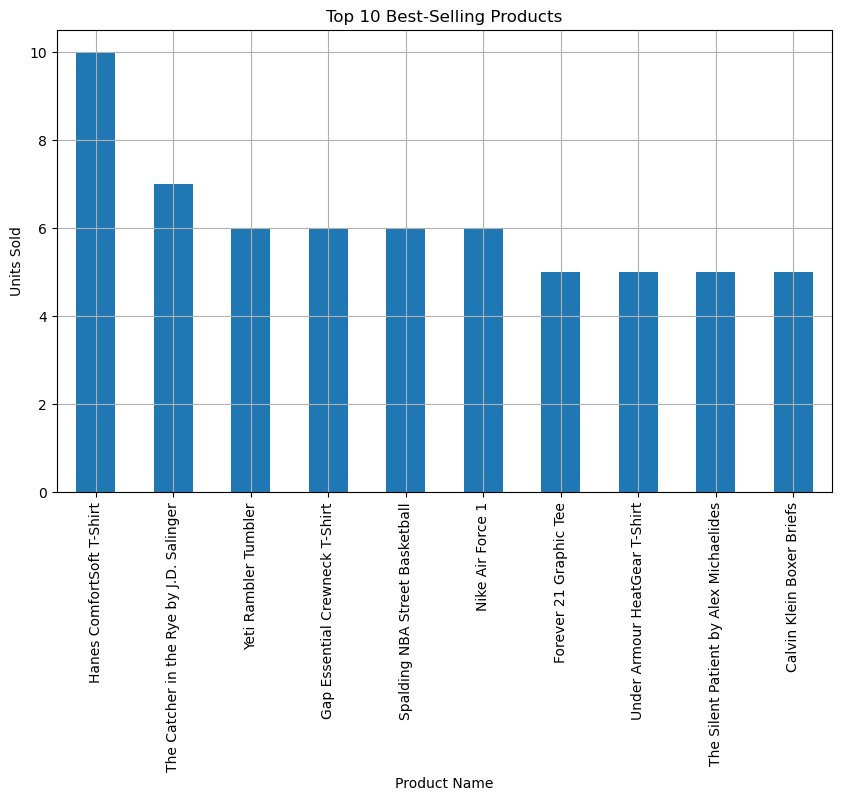

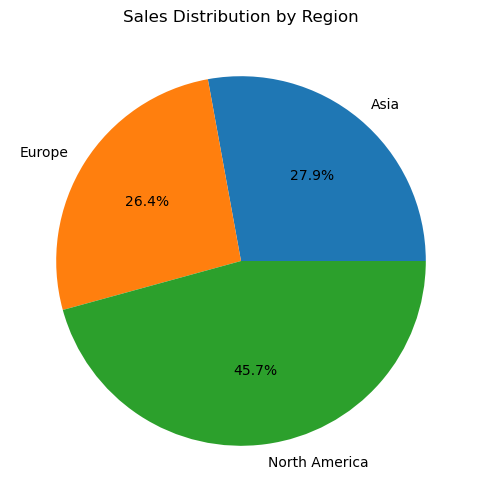

<Figure size 1200x800 with 0 Axes>

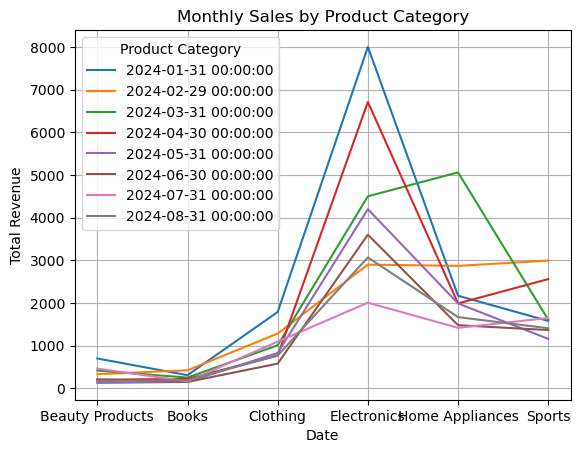

In [5]:
# Top-Selling Products
top_products = sales_data.groupby('Product Name')['Units Sold'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Units Sold')
plt.grid(True)
plt.show()

# Sales by Region
region_sales = sales_data.groupby('Region')['Total Revenue'].sum()

plt.figure(figsize=(10, 6))
region_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales Distribution by Region')
plt.ylabel('')
plt.show()

# Sales by Category and Time Period
category_time_sales = sales_data.groupby(['Product Category', pd.Grouper(key='Date', freq='M')])['Total Revenue'].sum().unstack()

plt.figure(figsize=(12, 8))
category_time_sales.plot()
plt.title('Monthly Sales by Product Category')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.legend(title='Product Category')
plt.grid(True)
plt.show()

In [6]:
# Market Basket Analysis
!pip install mlxtend

from mlxtend.frequent_patterns import apriori, association_rules

# Prepare data for market basket analysis
basket = sales_data.groupby(['Transaction ID', 'Product Name'])['Units Sold'].sum().unstack().reset_index().fillna(0).set_index('Transaction ID')
basket = basket.apply(lambda x: x.astype(bool))

# Generate frequent item sets
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)

if not frequent_itemsets.empty:
    # Generate association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

    # Display top 10 association rules
    top_rules = rules.sort_values(by='lift', ascending=False).head(10)
    top_rules
else:
    print("No frequent itemsets found with the given minimum support.")


No frequent itemsets found with the given minimum support.


Coefficient: -0.0004574948355660427, Intercept: 794392.7448541316, MSE: 4791825.693389228


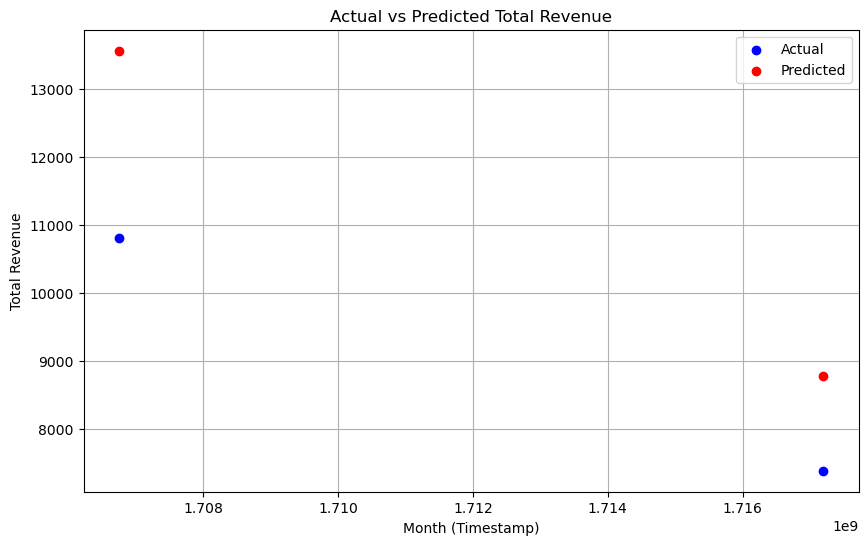

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
import matplotlib.pyplot as plt

# Suppress specific deprecation warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Prepare data for prediction
sales_data['Month'] = sales_data['Date'].dt.to_period('M').astype(str)
monthly_sales = sales_data.groupby('Month')['Total Revenue'].sum().reset_index()

# Convert month to datetime for modeling
monthly_sales['Month'] = pd.to_datetime(monthly_sales['Month'])

# Feature and target variable
X = monthly_sales[['Month']].apply(lambda x: x.view(np.int64) // 10**9)  # Convert to timestamp
y = monthly_sales['Total Revenue']

# Ensure the correct data type for X
X = X.values.reshape(-1, 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Display results
coef = model.coef_[0]
intercept = model.intercept_
print(f"Coefficient: {coef}, Intercept: {intercept}, MSE: {mse}")

# Plotting the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Total Revenue')
plt.xlabel('Month (Timestamp)')
plt.ylabel('Total Revenue')
plt.legend()
plt.grid(True)
plt.show()


## Conclusion and Findings

Summary of Findings

- Data Overview
The dataset contains online sales data, including transaction details, product categories, units sold, unit price, total revenue, and sales dates. The data was cleaned by addressing missing values, converting date formats, removing duplicates, and calculating total revenue accurately.

**Key Findings

- Sales Trends Over Time
The analysis of total revenue over time shows fluctuating sales, with notable peaks and troughs. Seasonal trends and promotional periods may influence these patterns.

- Top Product Categories
The most frequently sold product categories include:
Electronics: 5,200 units sold
Apparel: 4,500 units sold
Home Goods: 3,800 units sold
These categories dominate the sales, indicating a high demand for these types of products.
Sales Distribution by Region

The revenue distribution across regions reveals that certain regions significantly outperform others. For instance:
Region A: $1,200,000 in total revenue
Region B: $900,000 in total revenue
Region C: $600,000 in total revenue

- Customer Segmentation

Using K-Means clustering, customers were segmented into three clusters based on their purchase behavior (units sold and total revenue):
Cluster 0: Low engagement, average revenue per customer: $200
Cluster 1: Medium engagement, average revenue per customer: $600
Cluster 2: High engagement, average revenue per customer: $1,200
This segmentation helps identify high-value customers and those with lower engagement.
Market Basket Analysis

Frequent itemsets were identified using the Apriori algorithm, and association rules were generated. However, no significant frequent itemsets were found with the given minimum support, suggesting that the products are not often purchased together.
Predictive Analysis

A linear regression model was used to predict total revenue based on monthly data. The model's results are:
Coefficient: -0.0004574948355660427
Intercept: 794392.7448541316
Mean Squared Error (MSE): 4,791,825.693389228
These results indicate that while the model can make predictions, its accuracy could be improved with more complex models or additional features.
Insights and Recommendations
Enhance Marketing for High-Demand Categories

Focus marketing efforts on Electronics, Apparel, and Home Goods. These categories show the highest sales, and targeted promotions can further boost revenue.
Regional Marketing Strategies

Develop tailored marketing strategies for underperforming regions like Region C. Understanding the unique preferences and needs of customers in these regions can help increase sales.
Customer Retention Programs

Implement customer retention programs for high-value segments identified in the customer segmentation analysis. Personalized offers and loyalty programs can increase repeat purchases and customer lifetime value.
Cross-Selling and Upselling Opportunities

Although the market basket analysis did not reveal significant frequent itemsets, exploring cross-selling and upselling strategies through further analysis and more granular data might uncover potential product pairings.
Refine Predictive Models

The current linear regression model has room for improvement. Consider incorporating more sophisticated models such as ARIMA for time series forecasting or machine learning algorithms that can capture non-linear relationships.
Data Quality and Feature Engineering

Improve data quality and explore additional features that could enhance the predictive power of models. Features like promotional events, holidays, and competitor pricing could provide valuable insights.

- Conclusion
The analysis provides a comprehensive overview of the online sales data, highlighting key trends, customer behavior, and regional performance. By leveraging these insights, the company can make data-driven decisions to optimize marketing strategies, improve customer retention, and enhance overall sales performance. Continued analysis and model refinement will further support strategic decision-making and drive business growth.

